In [1]:
import numpy as np
import diffusion
import importlib
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
diffusion = importlib.reload(diffusion)
rng = np.random.default_rng(0)
shape = (2, 3, 4)
x = rng.normal(size=shape)
mean = rng.normal(size=shape)
var = np.exp(rng.normal(size=shape))
log_p, score = diffusion.compute_normal_log_p_and_score(x, mean, var)
assert log_p.shape == shape, log_p.shape
assert score.shape == shape, score.shape

log_p, score = diffusion.compute_mixture_log_p_and_score(log_p, score)
assert log_p.shape == shape[:-1], log_p.shape
assert score.shape == shape[:-1], score.shape


In [ ]:
diffusion = importlib.reload(diffusion)
shape = (2, 3)
mean1, var1, log_evidence1 = diffusion.compute_normal_posterior_and_evidence(
    mean0=rng.normal(size=shape),
    var0=np.exp(rng.normal(size=shape)),
    x=rng.normal(size=shape),
    var=np.exp(rng.normal(size=shape)),
)
assert mean1.shape == shape
assert var1.shape == shape
assert log_evidence1.shape == shape

In [ ]:
diffusion = importlib.reload(diffusion)
rng = np.random.default_rng(0)

noise_schedule = diffusion.LinearNoiseSchedule()
x_0 = np.array([-1.0, 0.0, 1.0])
nt = 10
trajectory_t, trajectory_x = noise_schedule.sample_diffusion_trajectory(x_0, nt, rng)
assert trajectory_t.shape == (nt + 1,)
assert trajectory_x.shape == (nt + 1, len(x_0))

mixture = diffusion.GaussianMixture(
    means=np.array([-1.0, 0.0, 1.0]),
    stddevs=np.array([0.1, 0.2, 0.3]),
    weights=np.array([0.8, 0.7, 0.6]),
)

interpolant = diffusion.GaussianMixtureInterpolant(
    noise_schedule=noise_schedule,
    x0_distr=mixture,
)

n_particles = 7
t = rng.uniform(size=n_particles)
x = rng.normal(size=n_particles)
log_p, score = interpolant.compute_log_pdf_and_score(t, x)
assert log_p.shape == (n_particles,)
assert score.shape == (n_particles,)

n_sample = 10
x0 = interpolant.sample_x0_given_xt(rng, n_sample, t, x)
assert x0.shape == (n_particles, n_sample), x0.shape

n_particles = 7
n_t = 10
trajectory_t, trajectory_x = interpolant.compute_probability_flow_trajectory(
    x_1=rng.normal(size=n_particles),
    nt=n_t,
)
assert trajectory_t.shape == (n_t + 1,)
assert trajectory_x.shape == (n_t + 1, n_particles)


In [ ]:

diffusion = importlib.reload(diffusion)
rng = np.random.default_rng(0)
noise_schedule = diffusion.CosineNoiseSchedule()
mixture = diffusion.GaussianMixture(
    means=np.array([-1.0, 2.0]),
    stddevs=np.array([0.1, 0.1]),
    weights=np.array([0.8, 0.2]),
)
interpolant = diffusion.GaussianMixtureInterpolant(
    noise_schedule=noise_schedule,
    x0_distr=mixture,
)
template = diffusion.make_interpolant_plot_template(interpolant, x_range=(-3, 3))
diffusion.plot_interpolant_pdf(template.interpolant_axes, interpolant, x_range=(-3, 3))
# trajectory_t, trajectory_x = interpolant.sample_diffusion_trajectory(rng, 1000, 10)
# template.interpolant_axes.plot(trajectory_t, trajectory_x, c='white', alpha=0.5, linewidth=0.5)
x1 = scipy.stats.norm.ppf(np.linspace(0, 1, 26))
trajectory_t, trajectory_x = interpolant.compute_probability_flow_trajectory(x1, 1000)
template.interpolant_axes.plot(trajectory_t, trajectory_x, c='white', alpha=0.5, linewidth=0.5)

plt.show(template.figure)

In [ ]:
diffusion = importlib.reload(diffusion)
template = diffusion.plot_slope_distribution(0.1, None, None)
plt.show(template.figure)

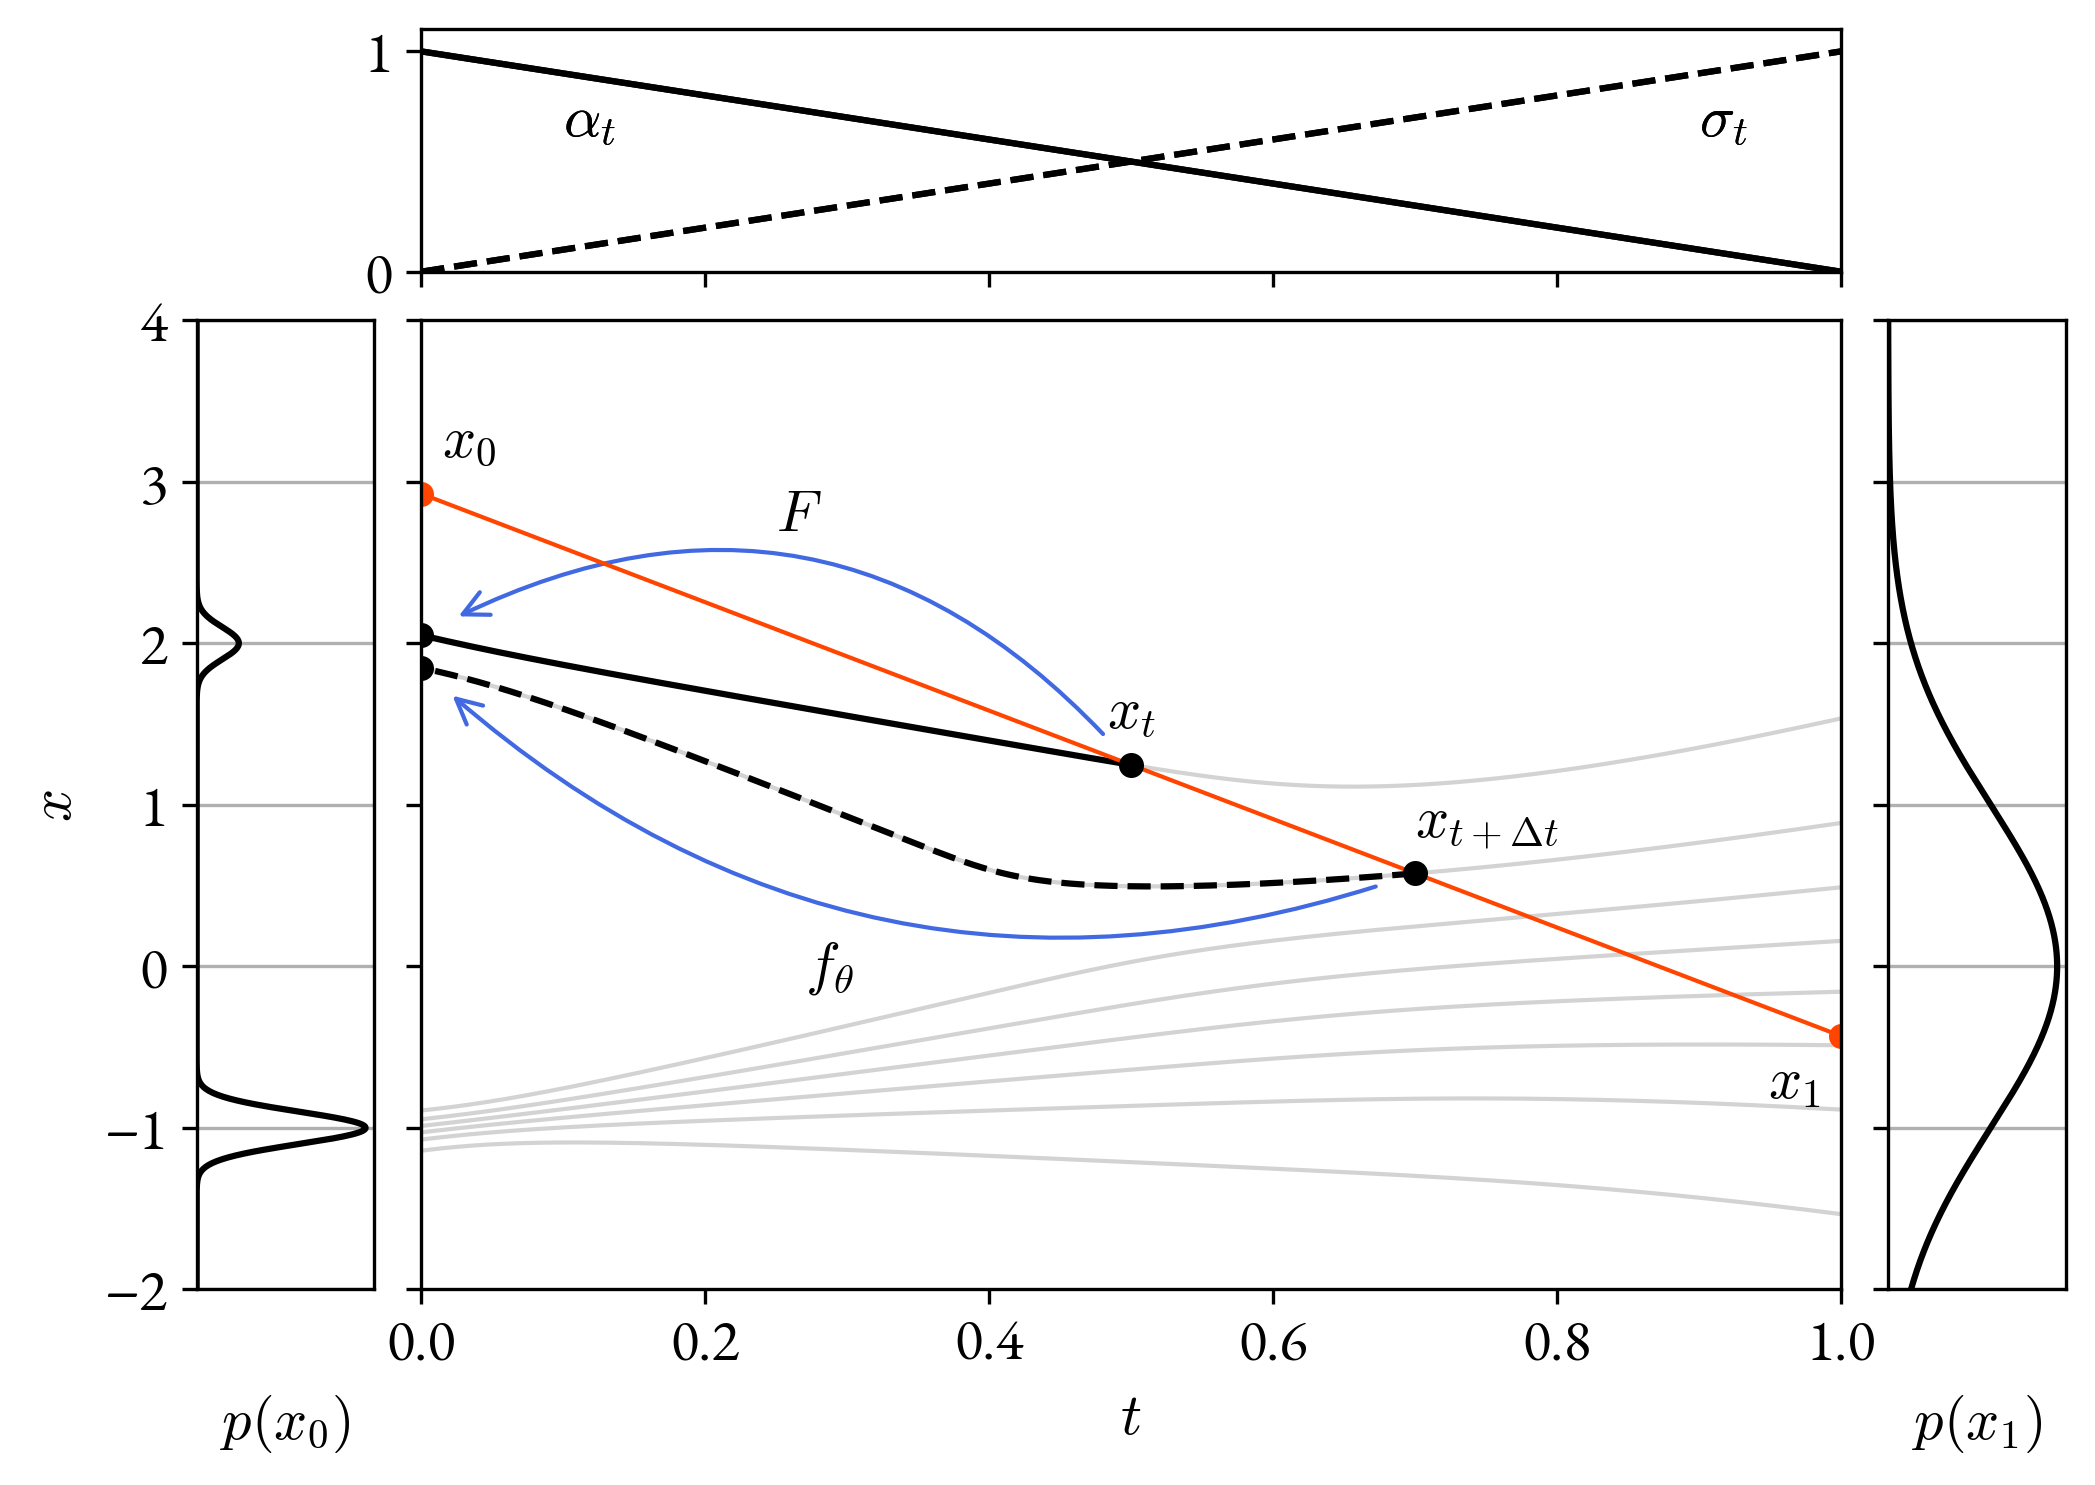

In [25]:
diffusion = importlib.reload(diffusion)
template = diffusion.plot_consistency_model_integration(None)
plt.show(template.figure)

In [ ]:
diffusion = importlib.reload(diffusion)
template = diffusion.plot_p_and_score(None)
plt.show(template.figure)